# *1. Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# *2. Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [ ]:
import pandas as pd
from pandas.core.frame import DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/khungbo/terrorism-in-turkey.csv', usecols=['city', 'Target_type'])

df

,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
...,...,...
542,Unknown,Military
543,Istanbul,Journalists & Media
544,Dogubeyazit district,Transportation
545,Semdinli district,Military


In [ ]:
#Tìm missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")
#--------------------------------------
#df.dropna()
#df.drop_duplicates()
#df

df= df.replace('Unknown', np.nan)
df.dropna(inplace=True)
df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df


No missing value found


,city,Target_type
0,Istanbul,Police
1,Istanbul,Tourists
2,Ankara,NGO
3,Kucukmece,Business
4,Yesilkoy,Transportation
...,...,...
506,Diyarbakir,Police
507,Istanbul,Journalists & Media
508,Dogubeyazit district,Transportation
509,Semdinli district,Military


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         511 non-null    object
 1   Target_type  511 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [ ]:
df.describe()

,city,Target_type
count,511,511
unique,162,18
top,Istanbul,Government (General)
freq,175,94


In [ ]:
df.to_csv(r'Terrorism.csv', index = False, header = True)

In [ ]:
import networkx as nx
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
City = df['city']
Type = df['Target_type']


print('Số thành phố:', City.nunique())
print('Số mục tiêu tấn công:', Type.nunique())
print('Số cạnh:', len(df))

Số thành phố: 162
Số mục tiêu tấn công: 18
Số cạnh: 511


# *3. Tạo node

In [ ]:
for index, row in df.iterrows():
  B.add_edge(row['city'], row['Target_type'], weight = 1)
B.add_nodes_from(City, bipartite = 0)
B.add_nodes_from(Type, bipartite = 1)

# *4. Code hiển thị đồ thị 2 phía

<Figure size 864x864 with 0 Axes>

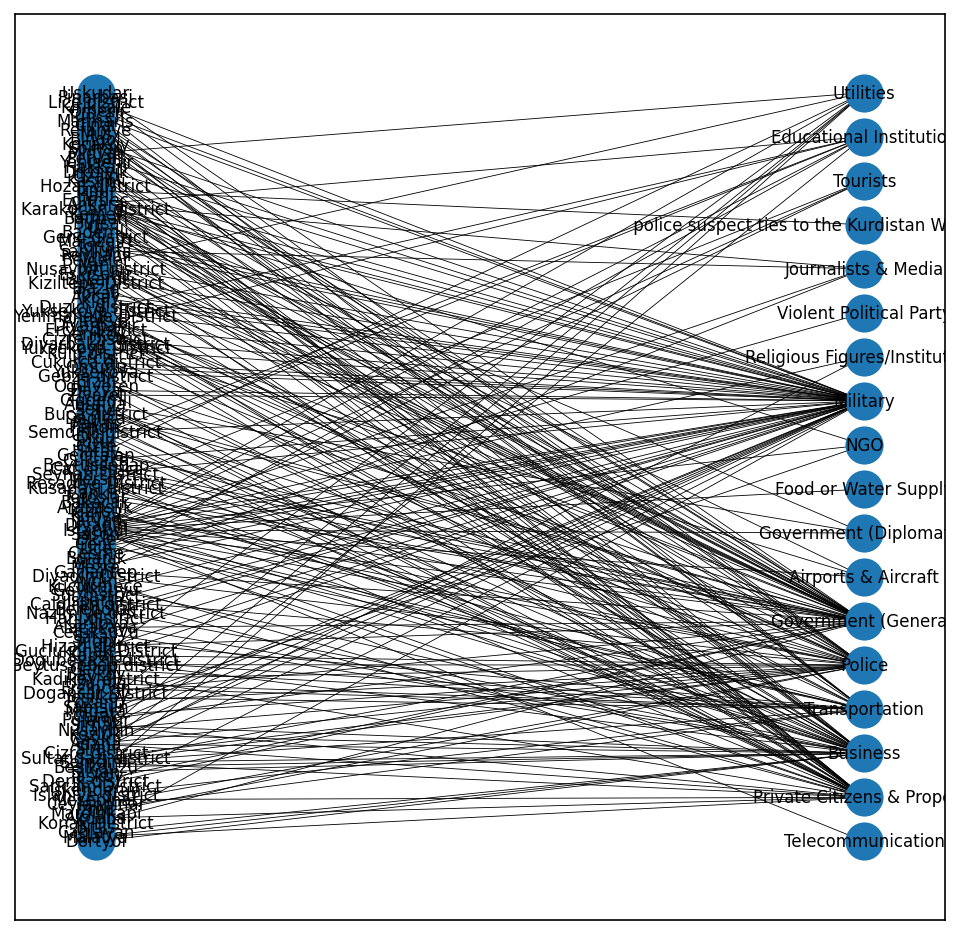

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, City), font_size=8, width=0.4)

- Node:  là tên của loại mục tiêu tấn công và tên các thành phố của nó.
- Edge: cho ta biết loại mục tiêu tấn công đó đã được thực hiện ở thành phố nào.


# *5. Code hiển thị đồ thị 1 phía:

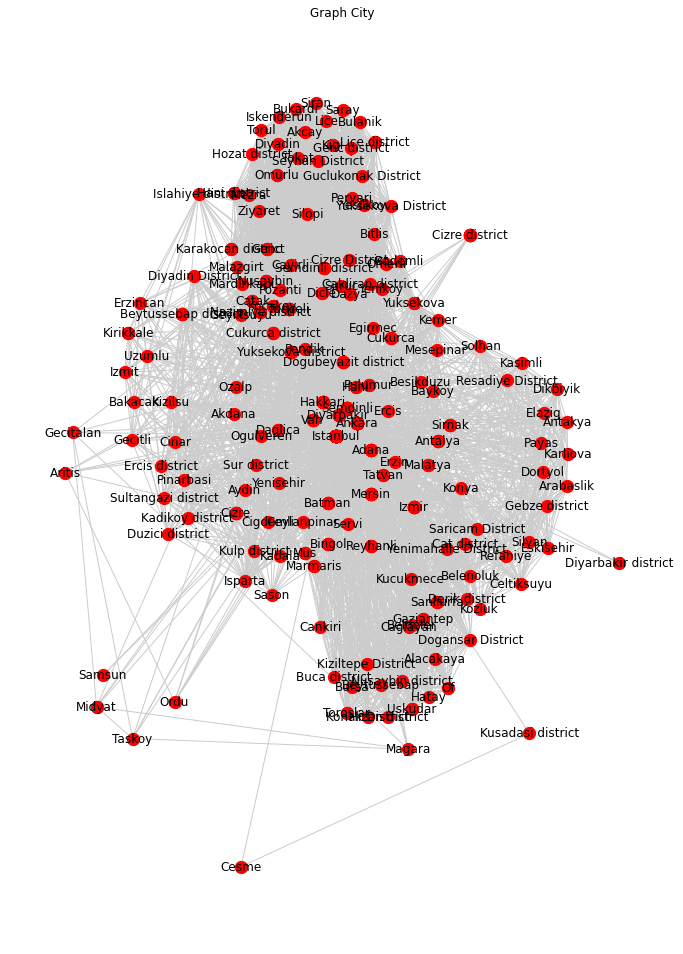

In [ ]:
G = bipartite.weighted_projected_graph(B, City.unique())
plt.figure(figsize=(12,17))
layout = nx.spring_layout(G, k=1)
nx.draw_networkx_nodes(G, layout, nodelist=City, node_size=150, node_color='red')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(City, City))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')
plt.title("Graph City")
plt.show()

- Node: là các thành phố (city).
- Edge: Hai thành phố có cùng mục tiêu tấn công sẽ hợp thành 1 cạnh.
Điều này nói lên rằng các vụ khủng bố tại các thành phố khác nhau tại Thổ Nhĩ Kỳ có nhiều mục tiêu tấn công khác nhau, các thành phố khác nhau có thể có cùng mục tiêu tấn công của bọn khủng bố.


# *6. Xuất dữ liệu để thao tác trên Gephi:

In [ ]:

labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'TerrorismNodes.csv', index = False, header = True)


In [ ]:
G2 = nx.Graph()

edges = df2[['source', 'target']]
G2 = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G2.nodes()))
print('Số cạnh của đồ thị là', len(G2.edges()))

Số đỉnh của đồ thị là 162
Số cạnh của đồ thị là 3575


In [ ]:
#dfn = pd.read_csv('myTerrorismdataNodes12.csv', usecols=['source', 'target','weight'])
#dfn.dropna()
#dfn.drop_duplicates()
#dfn

In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

# *7. Centrallity

In [ ]:
#Aerage_path_lenght
nx.average_shortest_path_length(G)

1.7258645809370448

In [ ]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  44.135802469135804


## Degree Centrality

In [ ]:
degree_dict = { node: 0 for node in G.nodes() }
for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))
  print(node,":",degree_dict[node])

Istanbul : 161
Ankara : 142
Kucukmece : 33
Yesilkoy : 20
Akdana : 31
Baykoy : 31
Resadiye District : 33
Dikbiyik : 33
Kizilsu : 30
Yuksekova district : 93
Kirikkale : 20
Diyarbakir : 153
Van : 121
Uskudar : 38
Bursa : 38
Seyhan District : 51
Batman : 80
Cankiri : 38
Mus : 53
Of : 38
Bingol : 53
Hakkari : 117
Yenimahalle District : 38
Yuksekova District : 51
Cat district : 38
Karakocan district : 51
Diyadin District : 30
Konya : 38
Kiziltepe District : 38
Elazig : 33
Cizre District : 51
Cayirli : 55
Adana : 74
Uzumlu : 20
Payas : 33
Dogansar District : 38
Caglayan : 33
Arabaslik : 33
Solhan : 33
Bulanik : 51
Cigdemli : 31
Catak : 71
Konak District : 38
Tunceli : 71
Toroslar : 38
Mesepinar : 31
Bademli : 31
Erzin : 38
Isparta : 30
Gaziantep : 38
Dazya : 51
Kadikoy district : 30
Aydin : 31
Izmir : 84
Eskisehir : 33
Tokat : 51
Pulumur : 82
Yenikoy : 31
Nusaybin : 71
Pervari : 51
Guclukonak District : 51
Mardinkapi : 30
Dortyol : 33
Mersin : 103
Yuksekova : 78
Omerli : 51
Yenisehir : 31
Tas

## Betweeness Centrality

In [ ]:
BetweenessCentrality = nx.betweenness_centrality(G)
sortedbetweenessCentrality =  dict(sorted(BetweenessCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedbetweenessCentrality.items():
        print(attr, ":", value)

        

Istanbul : 0.15147830063252746
Diyarbakir : 0.0938049051873927
Semdinli : 0.08393689276503244
Ankara : 0.07294911178307446
Van : 0.04532632135748902
Dogubeyazit district : 0.037851568929914155
Hakkari : 0.031868764421671206
Mersin : 0.027928144429375096
Yuksekova district : 0.01792051869741618
Izmir : 0.01623952377900589
Batman : 0.012518127924546783
Pulumur : 0.011325347919061266
Hani : 0.011325347919061266
Yuksekova : 0.010551272823329237
Cukurca : 0.010551272823329237
Adana : 0.010276025458750494
Genc : 0.010044088287488914
Dicle : 0.006773213773622406
Semdinli district : 0.006773213773622406
Mus : 0.005630746722019101
Bingol : 0.005630746722019101
Marmaris : 0.005630746722019101
Tatvan : 0.005294318653194581
Catak : 0.005116319151051518
Tunceli : 0.005116319151051518
Nusaybin : 0.005116319151051518
Kocakoy : 0.005116319151051518
Reyhanli : 0.00470343629242515
Cayirli : 0.0037267080745341614
Sirnak : 0.0035200672546306455
Antalya : 0.0035200672546306455
Malatya : 0.00352006725463064

## Closeness Centrality

In [ ]:
closenessCentrality = nx.closeness_centrality(G)
sortedClosenessCentrality =  dict(sorted(closenessCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedClosenessCentrality.items():
        print(attr, ":", value)

Istanbul : 1.0
Diyarbakir : 0.9526627218934911
Semdinli : 0.936046511627907
Ankara : 0.8944444444444445
Van : 0.8009950248756219
Hakkari : 0.7853658536585366
Mersin : 0.7351598173515982
Dogubeyazit district : 0.71875
Yuksekova district : 0.7030567685589519
Izmir : 0.6764705882352942
Pulumur : 0.6708333333333333
Hani : 0.6708333333333333
Batman : 0.6652892561983471
Yuksekova : 0.6598360655737705
Cukurca : 0.6598360655737705
Adana : 0.6491935483870968
Dicle : 0.6491935483870968
Semdinli district : 0.6491935483870968
Catak : 0.6414342629482072
Tunceli : 0.6414342629482072
Nusaybin : 0.6414342629482072
Kocakoy : 0.6414342629482072
Genc : 0.6313725490196078
Reyhanli : 0.6145038167938931
Tatvan : 0.6075471698113207
Cayirli : 0.602996254681648
Sirnak : 0.602996254681648
Antalya : 0.602996254681648
Malatya : 0.602996254681648
Mus : 0.5985130111524164
Bingol : 0.5985130111524164
Marmaris : 0.5985130111524164
Seyhan District : 0.5940959409594095
Yuksekova District : 0.5940959409594095
Karakocan 

## Page rank

Istanbul : 0.029250054783955204
Diyarbakir : 0.02453074879474047
Ankara : 0.023470765603394457
Semdinli : 0.02343214807263898
Van : 0.018267425118502358
Hakkari : 0.016925973414519138
Mersin : 0.015505787600027444
Dogubeyazit district : 0.013896612792258008
Yuksekova district : 0.013839365217757587
Izmir : 0.012201938047204092
Batman : 0.011773523397104468
Adana : 0.011318329196970914
Pulumur : 0.010242931257953794
Hani : 0.010242931257953794
Yuksekova : 0.0097890577030674
Cukurca : 0.0097890577030674
Dicle : 0.009435997849177705
Semdinli district : 0.009435997849177705
Catak : 0.009360507994226934
Tunceli : 0.009360507994226934
Nusaybin : 0.009360507994226934
Kocakoy : 0.009360507994226934
Genc : 0.008830157610300246
Reyhanli : 0.008469909331717746
Antalya : 0.008224166833707839
Sirnak : 0.008014295875685563
Malatya : 0.008014295875685563
Tatvan : 0.007938309057661833
Mus : 0.007858211085658992
Bingol : 0.007858211085658992
Marmaris : 0.00785821108565899
Daglica : 0.007585570026337243

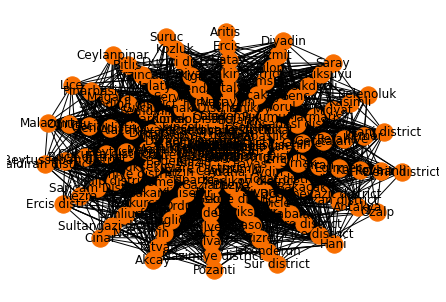

In [ ]:
ppr1 = nx.pagerank(G)
sortedRank = dict(sorted(ppr1.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedRank.items():
        print(attr, ":", value)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

## EigenVector Centrality

In [ ]:
eigenVectorCentrality = nx.eigenvector_centrality(G, weight='weight')
sortedEigenVectorCentrality =  dict(sorted(eigenVectorCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedEigenVectorCentrality.items():
        print(attr, ":", value)

Istanbul : 0.28188162269596034
Ankara : 0.2622099685302148
Diyarbakir : 0.26045032871484647
Semdinli : 0.25031056935259294
Van : 0.20727521439907579
Hakkari : 0.20049444043350745
Mersin : 0.17054719410307476
Yuksekova district : 0.16885505491310768
Batman : 0.13467680372023172
Dogubeyazit district : 0.1331311115167539
Izmir : 0.1293124459193343
Adana : 0.12681038152638485
Hani : 0.11582663234443652
Pulumur : 0.1158266323444365
Dicle : 0.11519552976394248
Semdinli district : 0.11519552976394248
Kocakoy : 0.11329190178924932
Catak : 0.11329190178924929
Tunceli : 0.11329190178924929
Nusaybin : 0.11329190178924929
Yuksekova : 0.1078575408875174
Cukurca : 0.1078575408875174
Reyhanli : 0.09243576389632242
Antalya : 0.0915675237325749
Daglica : 0.08990103334113526
Genc : 0.08837880975959769
Sirnak : 0.08446667243940334
Malatya : 0.08446667243940334
Tatvan : 0.08256304446471022
Cayirli : 0.07895606750280103
Seyhan District : 0.07020946460606463
Yuksekova District : 0.07020946460606463
Karakoca

# *8. GRAPH MINING

## Given Newman

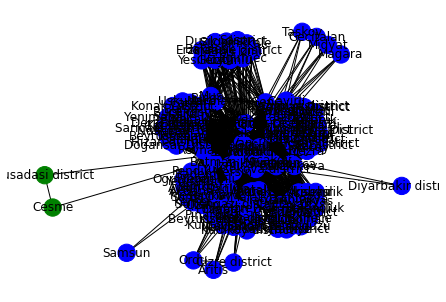

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]: 
        color_map.append('green')
    else:
        color_map.append('black')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

In [ ]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))
  

In [ ]:
print(node_groups)

[['Dortyol', 'Malatya', 'Caglayan', 'Bitlis', 'Konak District', 'Akdana', 'Mardinkapi', 'Izmit', 'Ceylanpinar', 'Mesepinar', 'Islahiye district', 'Iskenderun', 'Saricam District', 'Derik district', 'Taskoy', 'Silvan', 'Besikduzu', 'Semdinli', 'Sultangazi district', 'Cizre district', 'Siran', 'Adana', 'Kozluk', 'Cayirli', 'Sirnak', 'Nusaybin', 'Pulumur', 'Catak', 'Magara', 'Samsun', 'Pozanti', 'Yesilkoy', 'Erzincan', 'Dogansar District', 'Uzumlu', 'Kadikoy district', 'Baykoy', 'Gecitli', 'Beytussebap district', 'Dogubeyazit district', 'Kabala', 'Hizan district', 'Guclukonak District', 'Silopi', 'Saray', 'Celtiksuyu', 'Alacakaya', 'Karliova', 'Hani district', 'Nazimiye district', 'Belenoluk', 'Caldiran district', 'Isparta', 'Sur district', 'Geyiksuyu', 'Kucukmece', 'Aydin', 'Diyadin District', 'Gaziantep', 'Mezra', 'Aritis', 'Bulanik', 'Lice', 'Genc', 'Dicle', 'Sason', 'Istanbul', 'Diyadin', 'Tatvan', 'Konya', 'Kizilsu', 'Arabaslik', 'Bakacak', 'Toroslar', 'Cankiri', 'Resadiye District',

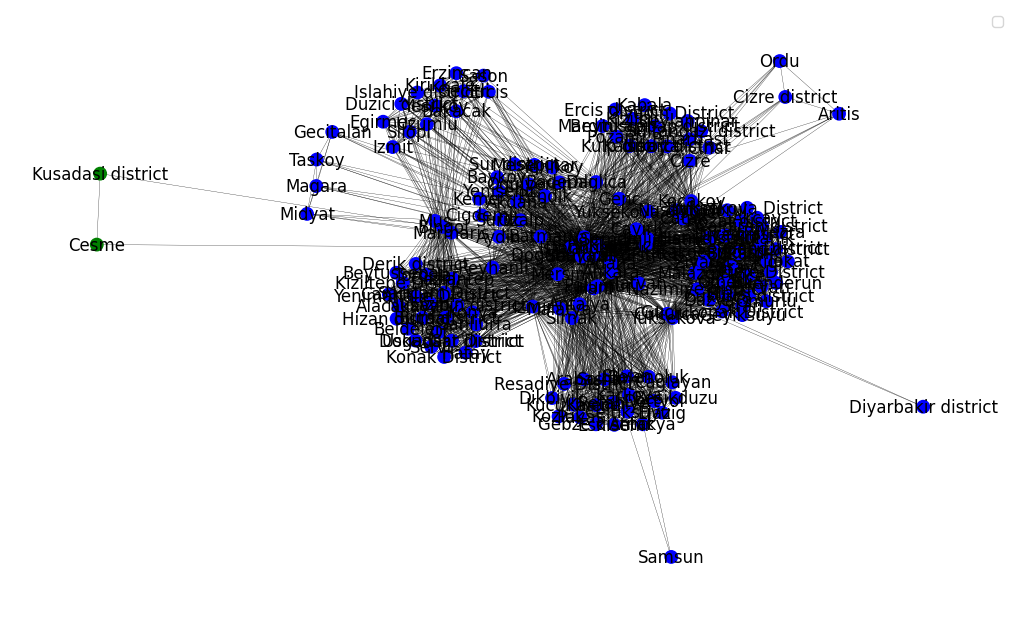

In [ ]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.spring_layout(G)
fig = plt.figure(figsize = (10,6), dpi=100)



cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)


nx.draw(G, node_color=color_map, with_labels=True,node_size = 80,width = 0.2)
# nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = color_map, node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')


plt.legend()
plt.show()

## Louvain

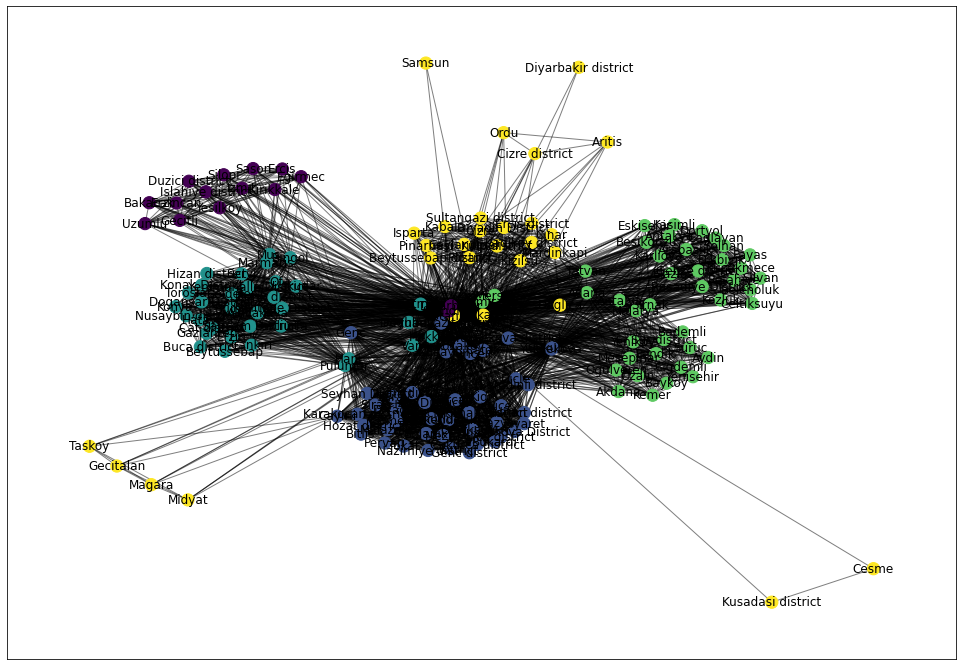

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib

plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()




In [ ]:
values = list(partition.values())

print("Số lượng cụm: ", len(np.unique(values)))
print()


groups = [] 
print("Phân cụm")
for i in range(len(np.unique(values))):
  print("Cụm ", i)
  values = []
  for name, k in partition.items():
    if k == i:
       print(name, end=' | ')
       values.append(name)
  groups.append(values) # Thêm vào group
  print()
  print()

Số lượng cụm:  5

Phân cụm
Cụm  0
Yesilkoy | Kirikkale | Diyarbakir | Uzumlu | Semdinli | Islahiye district | Bakacak | Sason | Egirmec | Silopi | Duzici district | Erzincan | Gecitli | Izmit | Ercis | 

Cụm  1
Yuksekova district | Seyhan District | Yuksekova District | Karakocan district | Cizre District | Cayirli | Bulanik | Catak | Tunceli | Dazya | Tokat | Nusaybin | Pervari | Guclukonak District | Yuksekova | Omerli | Ziyaret | Hozat district | Torul | Kocakoy | Bukardi | Geyiksuyu | Dicle | Siran | Genc | Kigi | Semdinli district | Genc district | Cukurca district | Cukurca | Dogubeyazit district | Bitlis | Omurlu | Mezra | Nazimiye district | Iskenderun | Lice district | Hani district | Saray | Diyadin | Lice | Malazgirt | Caldiran district | Akcay | 

Cụm  2
Van | Uskudar | Bursa | Batman | Cankiri | Mus | Of | Bingol | Hakkari | Yenimahalle District | Cat district | Konya | Kiziltepe District | Dogansar District | Konak District | Toroslar | Erzin | Gaziantep | Pulumur | Servi

In [ ]:
group_0 = df.loc[df["city"].isin(groups[0])]
print(group_0)

           city              Target_type
0      Istanbul                   Police
1      Istanbul                 Tourists
2        Ankara                      NGO
5      Istanbul  Violent Political Party
7      Istanbul                   Police
..          ...                      ...
504    Istanbul                 Business
505  Diyarbakir                   Police
506  Diyarbakir                   Police
507    Istanbul      Journalists & Media
510    Istanbul                 Business

[277 rows x 2 columns]


In [ ]:
group_1 = df.loc[df["city"].isin(groups[1])]
print(group_1)

                  city                  Target_type
3            Kucukmece                     Business
6               Akdana  Private Citizens & Property
8               Baykoy  Private Citizens & Property
10   Resadiye District                     Business
12            Dikbiyik                     Business
..                 ...                          ...
450              Adana  Private Citizens & Property
453             Tatvan                       Police
468       Sur district  Private Citizens & Property
494              Ozalp  Private Citizens & Property
501              Izmir                     Business

[69 rows x 2 columns]


In [ ]:
group_2 = df.loc[df["city"].isin(groups[2])]
print(group_2)

                  city                  Target_type
4             Yesilkoy               Transportation
16           Kirikkale               Transportation
69              Uzumlu               Transportation
228           Semdinli                     Military
232  Islahiye district               Transportation
236           Semdinli  Private Citizens & Property
237           Semdinli  Private Citizens & Property
262            Bakacak               Transportation
303              Sason               Transportation
304           Semdinli  Private Citizens & Property
308            Egirmec               Transportation
309           Semdinli         Government (General)
310           Semdinli  Private Citizens & Property
313           Semdinli  Private Citizens & Property
316           Semdinli               Transportation
329             Silopi               Transportation
334    Duzici district               Transportation
337           Erzincan               Transportation
343         

In [ ]:
group_3 = df.loc[df["city"].isin(groups[3])]
print(group_3)

          city Target_type
208     Taskoy   Utilities
266  Gecitalan   Utilities
320     Midyat   Utilities
335     Midyat   Utilities
342     Magara   Utilities


In [ ]:
group_4 = df.loc[df["city"].isin(groups[4])]
print(group_4)

               city                  Target_type
18              Van                     Military
19          Uskudar         Government (General)
20            Bursa         Government (General)
27           Batman  Private Citizens & Property
29          Cankiri         Government (General)
..              ...                          ...
473            Hani         Government (General)
474            Hani                     Military
488        Marmaris         Government (General)
491             Van  Private Citizens & Property
496  Derik district         Government (General)

[62 rows x 2 columns]


In [ ]:
result0 = pd.pivot_table(group_0, values = "city", index=["Target_type"], aggfunc=np.count_nonzero)
result0 = result0.reset_index(["Target_type"])
result0.sort_values(by = "city", ascending = False)
group_0.to_csv("group0.csv", index = False, header = True, encoding = "utf-8")

result1 = pd.pivot_table(group_1, values = "city", index=["Target_type"], aggfunc=np.count_nonzero)
result1 = result1.reset_index(["Target_type"])
result1.sort_values(by = "city", ascending = False)
group_1.to_csv("group1.csv", index = False, header = True, encoding = "utf-8")

result2 = pd.pivot_table(group_2, values = "city", index=["Target_type"], aggfunc=np.count_nonzero)
result2 = result2.reset_index(["Target_type"])
result2.sort_values(by = "city", ascending = False)
group_2.to_csv("group2.csv", index = False, header = True, encoding = "utf-8")

result3 = pd.pivot_table(group_3, values = "city", index=["Target_type"], aggfunc=np.count_nonzero)
result3 = result3.reset_index(["Target_type"])
result3.sort_values(by = "city", ascending = False)
group_3.to_csv("group3.csv", index = False, header = True, encoding = "utf-8")

result4 = pd.pivot_table(group_4, values = "city", index=["Target_type"], aggfunc=np.count_nonzero)
result4 = result4.reset_index(["Target_type"])
result4.sort_values(by = "city", ascending = False)
group_4.to_csv("group4.csv", index = False, header = True, encoding = "utf-8")

## K-Mean

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
dfkmean = df.copy()
dfkmean

,city,Target_type
0,Istanbul,Police
1,Istanbul,Tourists
2,Ankara,NGO
3,Kucukmece,Business
4,Yesilkoy,Transportation
...,...,...
506,Diyarbakir,Police
507,Istanbul,Journalists & Media
508,Dogubeyazit district,Transportation
509,Semdinli district,Military


In [ ]:
k.fit(dfkmean['city'])
dfkmean['cityNum'] = k.transform(dfkmean['city'])
dfkmean['cityNum'].drop_duplicates()

0       78
2        4
3       95
4      157
6        2
      ... 
465    123
468    143
473     70
494    118
496     43
Name: cityNum, Length: 162, dtype: int64

In [ ]:
k.fit(dfkmean['Target_type'])
dfkmean['TargetNum'] = k.transform(dfkmean['Target_type'])
dfkmean['TargetNum'].drop_duplicates()

0      10
1      14
2       9
3       2
4      15
5      17
6      11
9       1
11      6
15      8
46     16
88      4
96      3
101     7
120    13
171     5
178    12
245     0
Name: TargetNum, dtype: int64

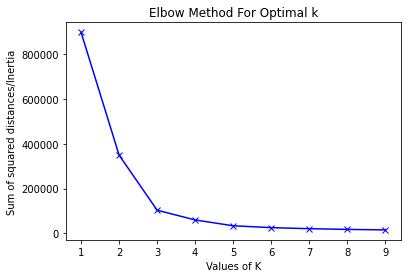

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters = num_clusters)
  kmeans.fit(dfkmean[['cityNum', 'TargetNum']])
  sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel( 'Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

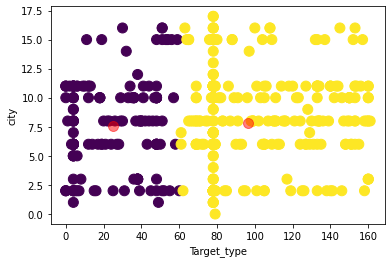

Toạ độ trung tâm cụm:  [[24.72727273  7.58441558]
 [96.17927171  7.80392157]]


In [ ]:
algorithm = KMeans(n_clusters = 2, init='random' )
algorithm.fit(dfkmean[['cityNum','TargetNum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'cityNum' ,y = 'TargetNum' , data = dfkmean[['cityNum','TargetNum']], c = labels2, s = 100 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 100, c = 'red', alpha = 0.5)
plt.ylabel('city'), plt.xlabel('Target_type')
plt.show()
print('Toạ độ trung tâm cụm: ', centroids2)

In [ ]:
note = dfkmean.drop_duplicates(subset='Target_type', keep="last")
print('Số mục tiêu tấn công: ',len(note[['Target_type','TargetNum']]))
print(note[['Target_type','TargetNum']].to_string())


Số mục tiêu tấn công:  18
                                                    Target_type  TargetNum
43                                      Violent Political Party         17
88                                         Food or Water Supply          4
120                                           Telecommunication         13
219                                                    Tourists         14
245   police suspect ties to the Kurdistan Workers Party (PKK).          0
276                                                         NGO          9
423                              Religious Figures/Institutions         12
441                                                   Utilities         16
446                                     Educational Institution          3
478                                         Airports & Aircraft          1
495                                 Private Citizens & Property         11
498                                        Government (General)          6

In [ ]:
noteGenre = dfkmean.drop_duplicates(subset='city', keep="last")
print('Số thành phố: ',len(noteGenre[['city','cityNum']]))
print(noteGenre[['city','cityNum']].to_string())

Số thành phố:  162
                     city  cityNum
3               Kucukmece       95
4                Yesilkoy      157
6                  Akdana        2
8                  Baykoy       13
10      Resadiye District      126
12               Dikbiyik       45
13                Kizilsu       89
20                  Bursa       24
21        Seyhan District      136
29                Cankiri       27
52                     Of      113
55   Yenimahalle District      155
57     Yuksekova District      159
58           Cat district       28
61       Diyadin District       47
62                  Konya       93
63     Kiziltepe District       90
64                 Elazig       55
65         Cizre District       37
69                 Uzumlu      152
70                Cayirli       30
72                  Payas      119
73      Dogansar District       50
77               Caglayan       25
78              Arabaslik        7
79                 Solhan      141
80     Karakocan district       83
8

In [ ]:
clusterX = dfkmean.loc[dfkmean['TargetNum'].isin([7, 8, 9])]
clusterY = dfkmean.loc[dfkmean['cityNum'].isin([37, 38])]
pd.merge(clusterX, clusterY, how='inner', on=['TargetNum', 'cityNum'])
# dfkmean

,city_x,Target_type_x,cityNum,TargetNum,city_y,Target_type_y
0,Cizre District,Military,37,8,Cizre District,Military


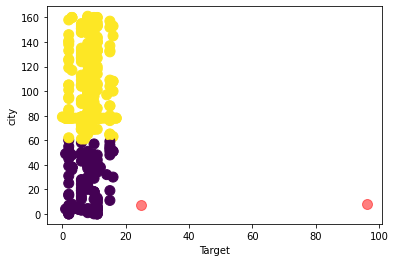

Toạ độ trung tâm cụm:  [[24.72727273  7.58441558]
 [96.17927171  7.80392157]]


In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 2, init='random' )
algorithm.fit(dfkmean[['cityNum','TargetNum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'TargetNum' ,y = 'cityNum' , data = dfkmean[['TargetNum','cityNum']], c = labels2, s = 100 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 100, c = 'red', alpha = 0.5)
plt.ylabel('city'), plt.xlabel('Target')
plt.show()
print('Toạ độ trung tâm cụm: ', centroids2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
#import ndlib.models.ModelConfig as mc
#import ndlib.models.epidemics as ep


from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans